<a href="https://colab.research.google.com/github/DeepeshMadane/Machine-learning-/blob/main/live_sales_facebook_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries


In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [190]:
df = pd.read_csv('Live.csv')

In [191]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [192]:
import warnings

warnings.filterwarnings('ignore')

In [193]:
df.shape

(7050, 16)

Null values

In [194]:
print(df.isnull().sum())

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


Droping null values columns

In [195]:
df.drop(['status_id','Column1','Column2','Column3','Column4'],axis=1,inplace=True)

In [196]:
df.drop_duplicates(inplace=True)

In [197]:
df.duplicated().sum()

0

array([[<Axes: title={'center': 'num_reactions'}>,
        <Axes: title={'center': 'num_comments'}>,
        <Axes: title={'center': 'num_shares'}>],
       [<Axes: title={'center': 'num_likes'}>,
        <Axes: title={'center': 'num_loves'}>,
        <Axes: title={'center': 'num_wows'}>],
       [<Axes: title={'center': 'num_hahas'}>,
        <Axes: title={'center': 'num_sads'}>,
        <Axes: title={'center': 'num_angrys'}>]], dtype=object)

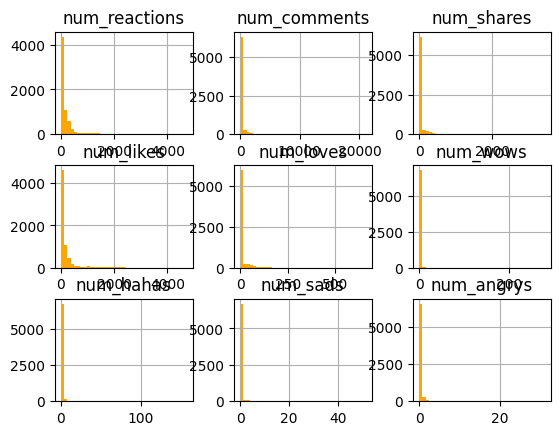

In [198]:
df.hist(bins='rice',color ='orange')

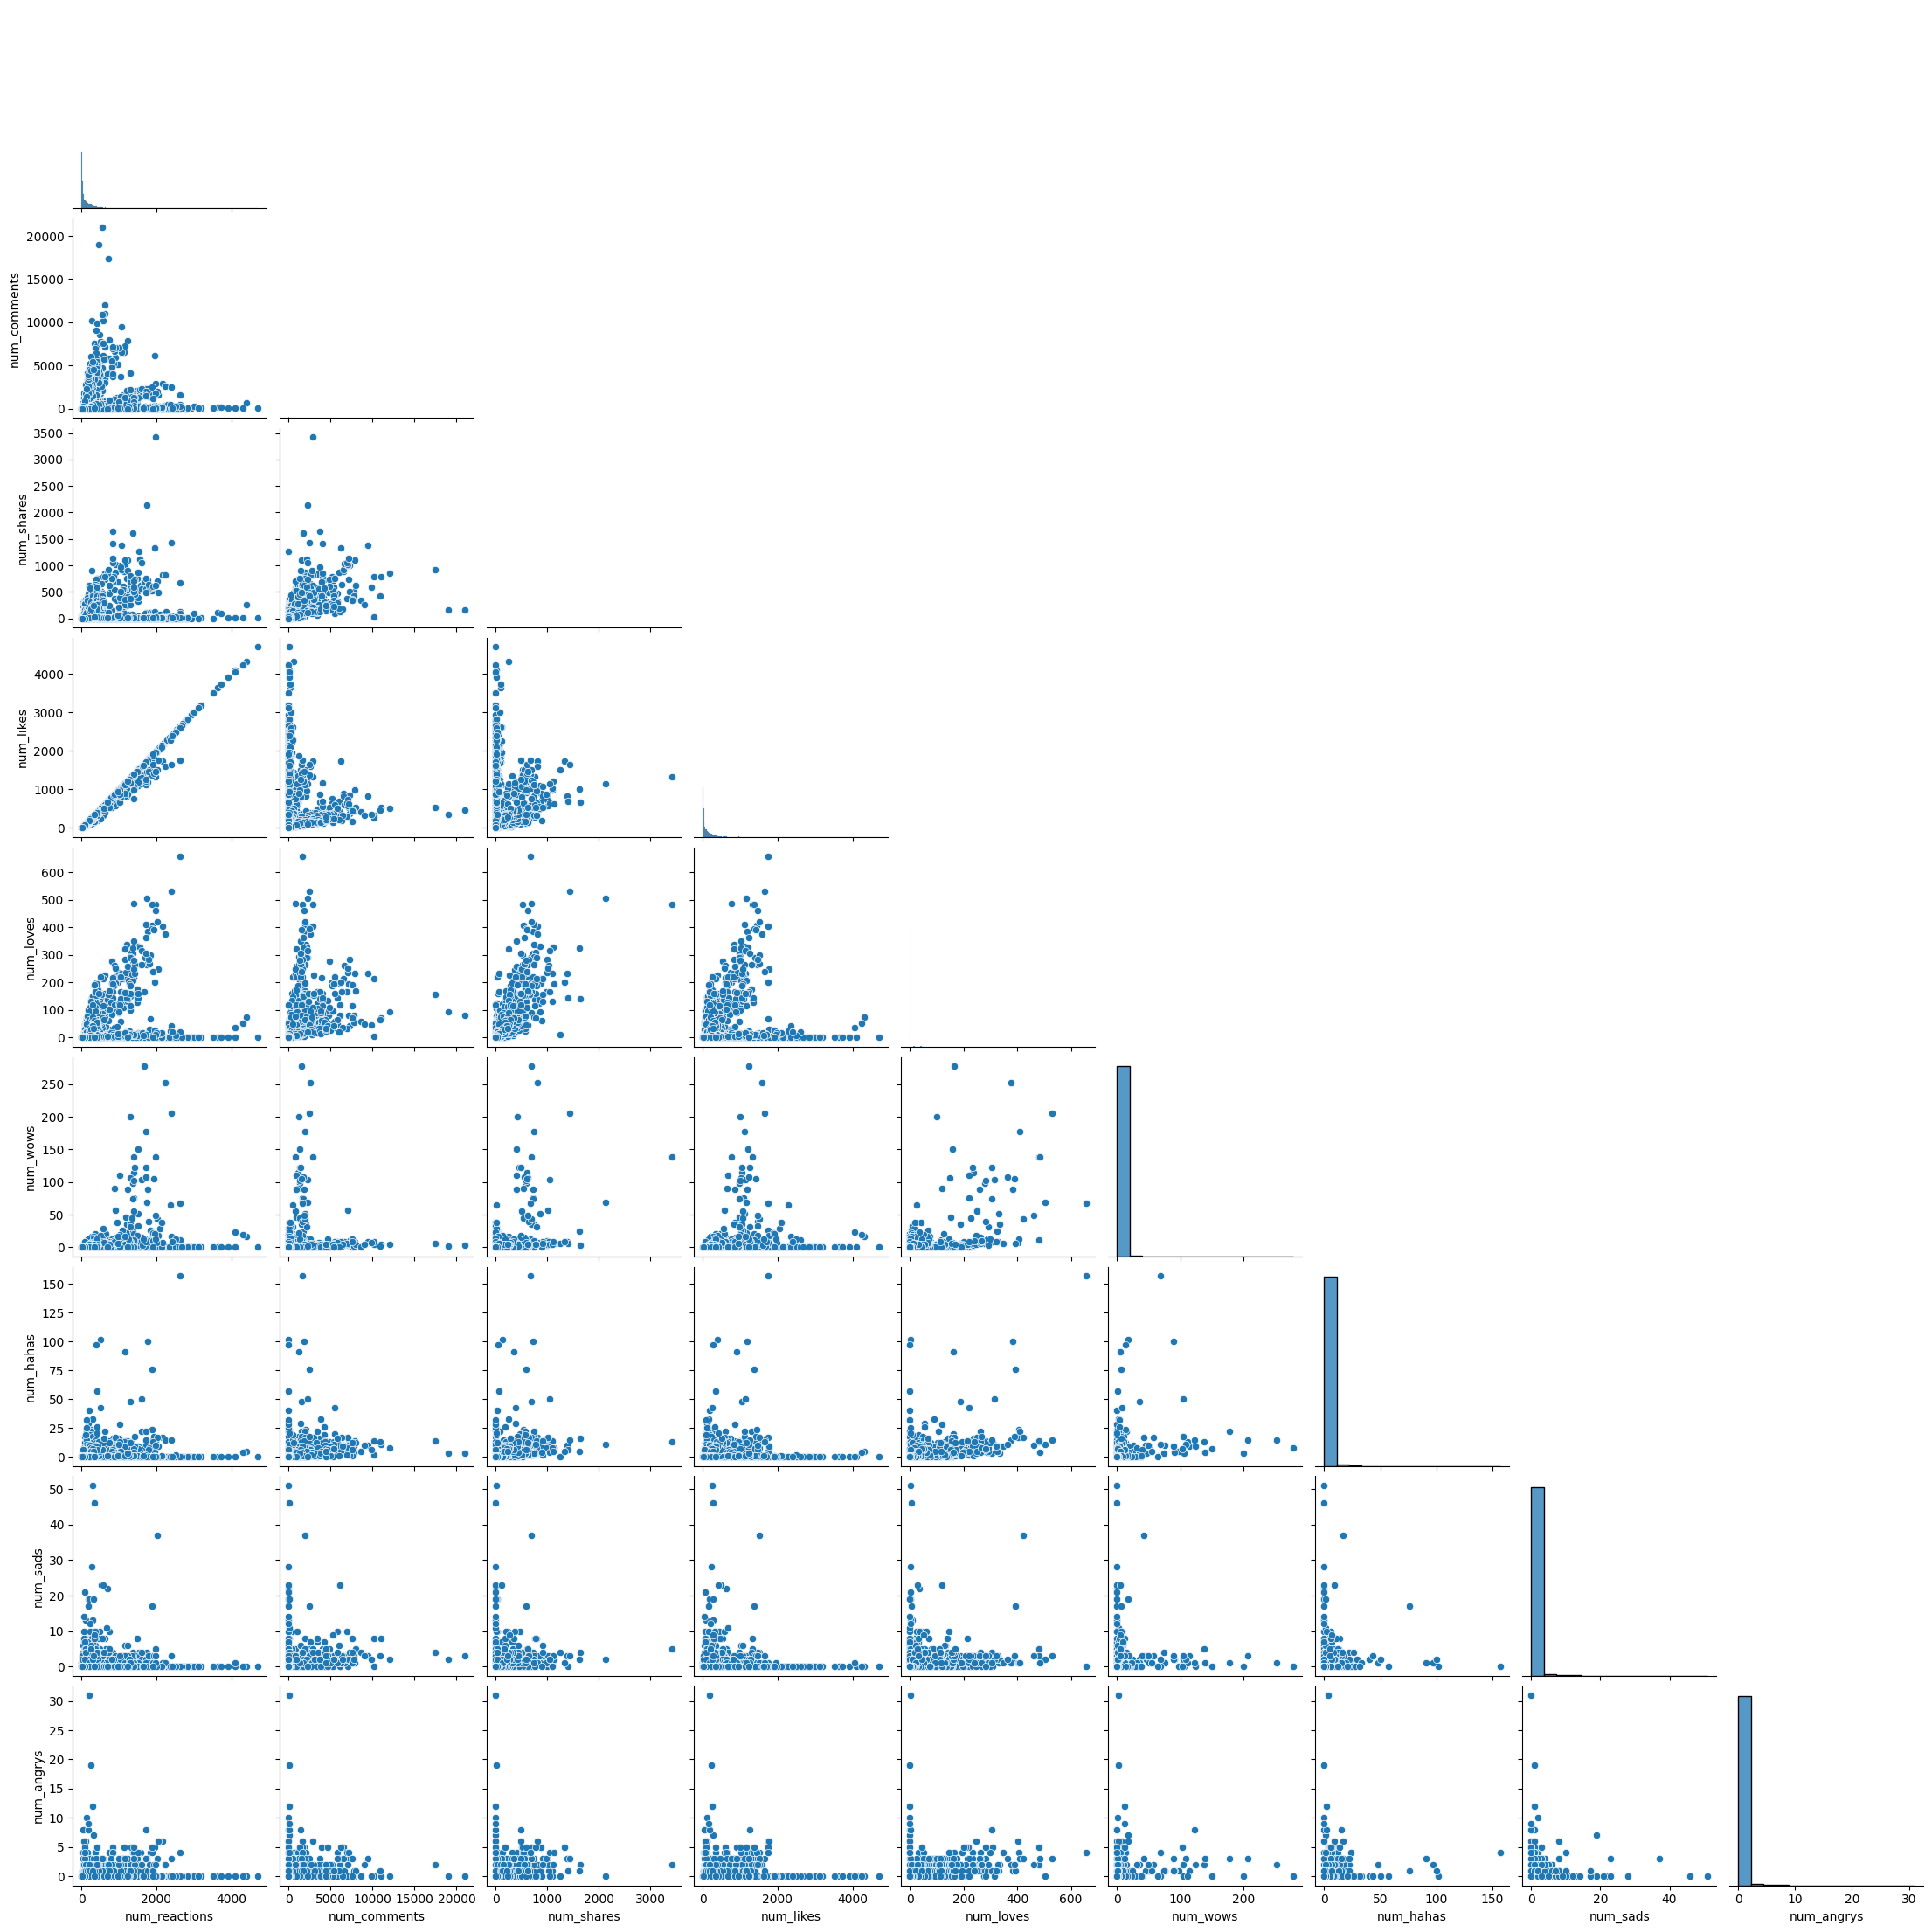

In [199]:
import seaborn as sns
sns.pairplot(df,corner=True)

Multicollinearity exbhited between num_reaction & num_likes
Therefore one the column can be dropped

In [200]:
df.drop(labels=['num_likes'],axis=1,inplace=True)

Label Encoding Object Data Types¶

In [201]:
from sklearn.preprocessing import LabelEncoder
lbl_en = LabelEncoder()
df['status_type'] = lbl_en.fit_transform(df['status_type'])

Feature Extraction
Obtaining the count of days from the day the status was published till date

In [202]:
df['days_published_tilldate'] = (pd.Timestamp.now().normalize() - pd.to_datetime(df['status_published'], errors='coerce'))

In [203]:
df['days_published_tilldate'] = df['days_published_tilldate'].astype(str).map(lambda x: x[:5])

Dropping the date column after extracting the days

In [204]:
df.drop(labels=['status_published'],axis=1,inplace=True)

In [205]:
from sklearn.preprocessing import StandardScaler
scaler_cols  = ['status_type',  'num_reactions', 'num_comments',
       'num_shares', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys', 'days_published_tilldate']
scaler = StandardScaler()
df[scaler_cols] = scaler.fit_transform(df[scaler_cols])

Preparing data for model
The values in form of 2d array

In [206]:
df_reshaped = df.iloc[:,:].values
df_reshaped.shape

(6996, 10)

In [207]:
df_reshaped.ndim

2

In [208]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1,31):
    kmeans_model = KMeans(n_clusters=i, init = 'k-means++',max_iter=300,tol=0.0001,random_state=42,algorithm='elkan')
    kmeans_model.fit(df_reshaped)
    inertia.append(kmeans_model.inertia_)

Visualizing the Elbow Chart
Plotting the inertia to see the rate of decrease in WCSS. The point when WCSS saturates is said to be the optimum number of clusters. As we can after 10 there is no considerable amount of fluctuation and the slope is smooth.

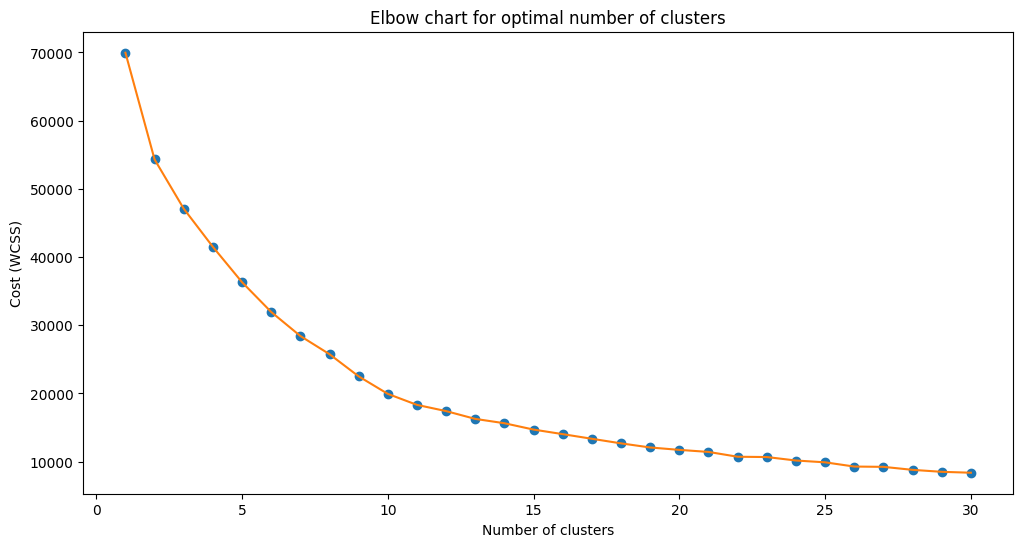

In [209]:
plt.subplots(figsize=(12,6))
plt.plot(np.arange(1,31), inertia, 'o') #align with no. of clusters
plt.plot(np.arange(1,31), inertia, '-')
plt.title('Elbow chart for optimal number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Cost (WCSS)')
plt.show()

In [210]:
kmeans_model = KMeans(n_clusters=10, init = 'k-means++',max_iter=300,tol=0.0001,random_state=42,algorithm='elkan')
kmeans_model.fit(df_reshaped)

KMeans(algorithm='elkan', n_clusters=10, random_state=42)

In [211]:
label = kmeans_model.labels_

In [212]:
centroids = kmeans_model.cluster_centers_
df_centroids = pd.DataFrame(centroids,columns=df.columns)
df_centroids

,status_type,num_reactions,num_comments,num_shares,num_loves,num_wows,num_hahas,num_sads,num_angrys,days_published_tilldate
0,-0.699308,-0.262486,-0.237654,-0.289146,-0.278016,-0.063034,-0.133866,-0.091723,-0.133243,-0.480138
1,1.350677,0.124410,1.054546,1.484387,1.437950,0.039124,0.515206,0.319368,0.526318,-0.623996
2,-0.287602,0.389905,0.323653,0.108654,0.660480,0.321891,0.249089,15.749446,1.019774,-0.307380
3,1.320111,-0.211139,-0.155430,-0.178989,-0.165974,-0.109504,-0.103092,-0.105098,-0.114357,-0.152502
4,0.762338,2.263831,0.910152,2.482653,5.383893,3.130371,24.284458,1.868142,2.121784,-0.739544
5,-0.749020,-0.410728,-0.245882,-0.302379,-0.318037,-0.143631,-0.175819,-0.157094,-0.160026,2.032043
6,-0.140687,3.472342,-0.188064,-0.221261,-0.261684,0.072218,-0.138851,-0.140264,-0.151981,0.609986
7,1.367710,2.928419,1.546868,5.984836,7.148064,14.962330,2.714373,0.870200,2.428430,-0.764411
8,1.350759,1.469387,5.067356,4.247878,3.825788,0.788674,2.148771,1.506300,2.209737,-0.651819
9,-0.751089,-0.086309,-0.221686,-0.296320,-0.310914,0.363840,0.111949,0.228665,19.961382,-0.607066


visualizing centriods


<Axes: >

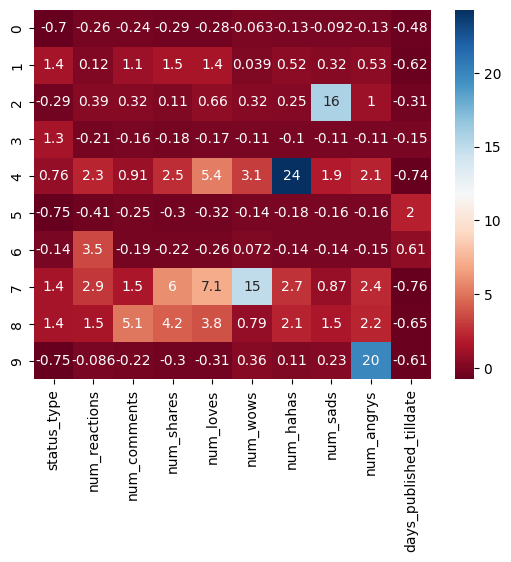

In [213]:
sns.heatmap(data=df_centroids,annot=True,cmap='RdBu')

In [214]:
from sklearn.decomposition import PCA
k_pca = PCA(n_components=2)
x_pca = k_pca.fit_transform(df_reshaped)

In [223]:
kmeans_model = KMeans(n_clusters=2, init = 'k-means++',max_iter=300,tol=0.0001,random_state=42,algorithm='elkan')
kmeans_model.fit(x_pca)

KMeans(algorithm='elkan', n_clusters=2, random_state=42)

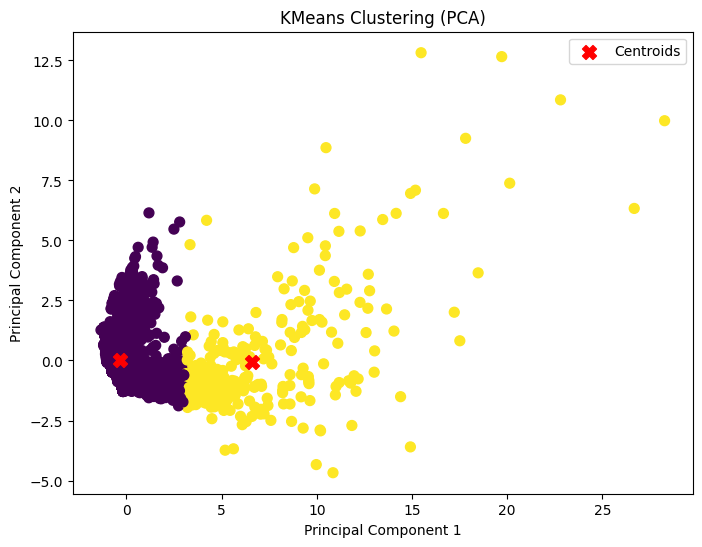

In [224]:
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans_model.labels_, s=50, cmap='viridis')

# Plot centroids
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=100, c='red', marker='X', label='Centroids')

plt.title('KMeans Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

In [220]:


## performance metrics
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,31):
  kmeans = KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(x_pca)
  score = silhouette_score(x_pca,kmeans.labels_)
  silhouette_coefficients.append(score)

In [221]:
silhouette_coefficients

[0.7661347213961833,
 0.6225306005240593,
 0.5608704612159475,
 0.5674561379728165,
 0.5613648232076525,
 0.5421563988357682,
 0.5756294326630901,
 0.574049662713031,
 0.5891675029889245,
 0.5910528757247555,
 0.5915052306692418,
 0.5921624859090322,
 0.5893938016536102,
 0.5901504398340304,
 0.5886998623974137,
 0.5884034768201891,
 0.5925516460741509,
 0.5905262994646769,
 0.574802513259016,
 0.5780902423698319,
 0.5729346591738832,
 0.5699034873273975,
 0.5710974212669747,
 0.578169751244866,
 0.5661530925175783,
 0.5702645870590269,
 0.5767410426696586,
 0.5751019715133462,
 0.5759906299014829]

Text(0, 0.5, 'silhouette_coefficients')

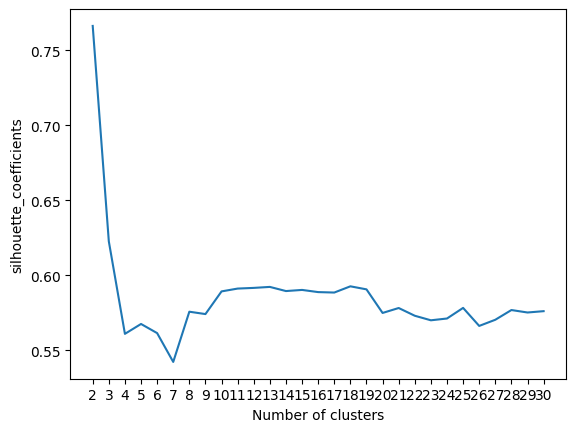

In [222]:
plt.plot(range(2,31),silhouette_coefficients)
plt.xticks(range(2,31))
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_coefficients')